In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset.csv', sep = ',')

In [3]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


### Análise Exploratória Inicial

In [4]:
df.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [5]:
df['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [6]:
#Verificando se há duplicatas
df[df.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [7]:
#Verificando se há valores nulos
df.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [8]:
df_CidadeComMaiorVenda = df[df['Categoria'].str.startswith('Office')].groupby('Cidade')['Valor_Venda'].sum().idxmax()
print("A cidade que obteve a maior venda da categoria Office Supplies foi", df_CidadeComMaiorVenda)

A cidade que obteve a maior venda da categoria Office Supplies foi New York City


#### Outra maneira de resolver, segundo o professor da DSA:

In [9]:
#Dividindo o problema
df_dsa = df[df['Categoria'] == 'Office Supplies']

In [10]:
#agrupar por cidade e calcular o total de valor_venda
df_dsatotal = df.groupby('Cidade')['Valor_Venda'].sum()

In [11]:
#encontrar a cidade com maior valor de venda
cidade = df_dsatotal.idxmax()
print("Cidade com maior valor de venda para 'Office Supplies':", cidade)

Cidade com maior valor de venda para 'Office Supplies': New York City


In [12]:
#para conferir o resultado
df_dsatotal.sort_values(ascending = False)

Cidade
New York City    251749.219
Los Angeles      171654.633
Seattle          114725.478
San Francisco    107489.952
Philadelphia     107197.803
                    ...    
Ormond Beach          2.808
Pensacola             2.214
Jupiter               2.064
Elyria                1.824
Abilene               1.392
Name: Valor_Venda, Length: 528, dtype: float64

### Qual o Total de Vendas Por Data do Pedido?

In [13]:
df_total = df.groupby('Data_Pedido')['Valor_Venda'].sum()

In [14]:
df_total.head()

Data_Pedido
01/01/2018    1481.8280
01/02/2015     468.9000
01/02/2017     161.9700
01/03/2015    2203.1510
01/03/2016    1642.1744
Name: Valor_Venda, dtype: float64

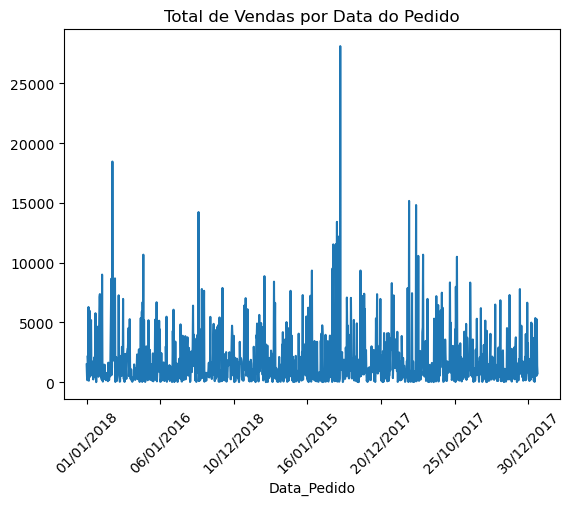

In [15]:
df_total.plot(x = 'Data_Pedido', y = 'Valor_Venda')
plt.xticks(rotation = 45)
plt.title('Total de Vendas por Data do Pedido')
plt.show()

#### Outra maneira de resolver, segundo o professor da DSA:

In [16]:
df_dsa2 = df.groupby('Data_Pedido')['Valor_Venda'].sum()

In [17]:
df_dsa2.head()

Data_Pedido
01/01/2018    1481.8280
01/02/2015     468.9000
01/02/2017     161.9700
01/03/2015    2203.1510
01/03/2016    1642.1744
Name: Valor_Venda, dtype: float64

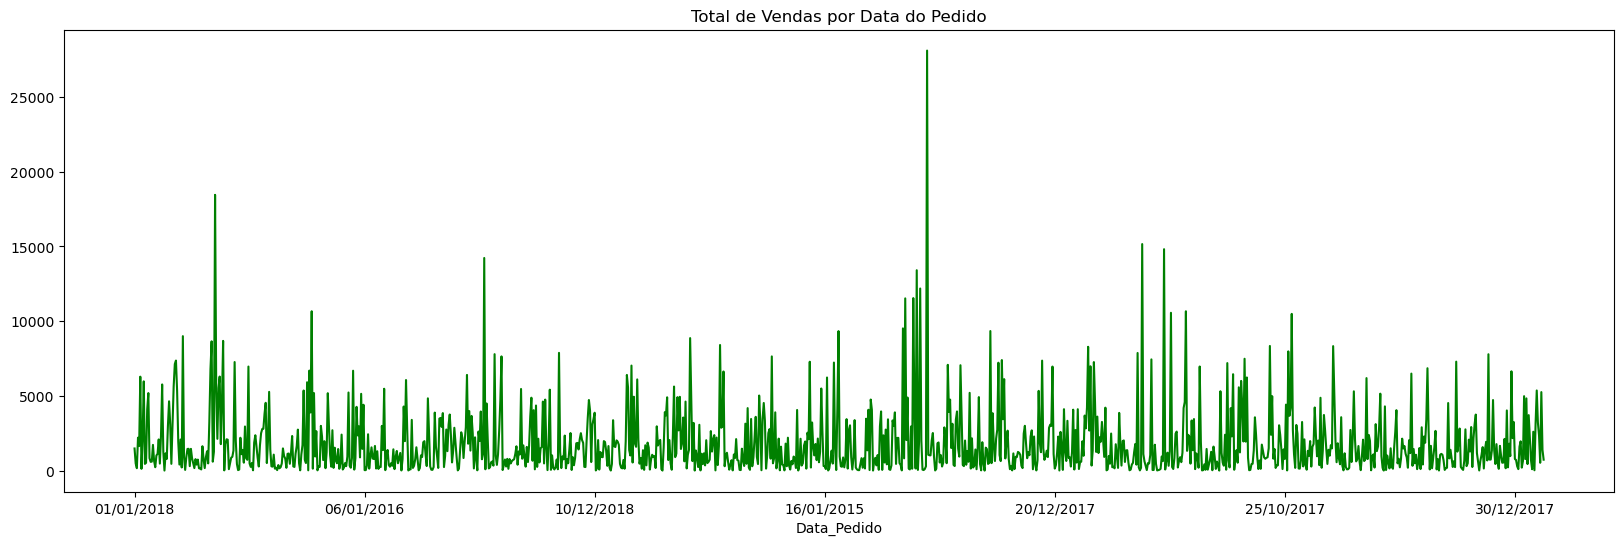

In [18]:
plt.figure(figsize = (20, 6))
df_dsa2.plot(x = 'Data_Pedido', y = 'Valor_Venda', color = 'green')
plt.title('Total de Vendas por Data do Pedido')
plt.show()

### Qual o Total de Vendas por Estado?

In [19]:
df_estado = df.groupby('Estado')['Valor_Venda'].sum().reset_index()

In [20]:
df_estado.head()

,Estado,Valor_Venda
0,Alabama,19510.6400
1,Arizona,35272.6570
2,Arkansas,11673.8300
3,California,442927.0975
4,Colorado,31841.5980


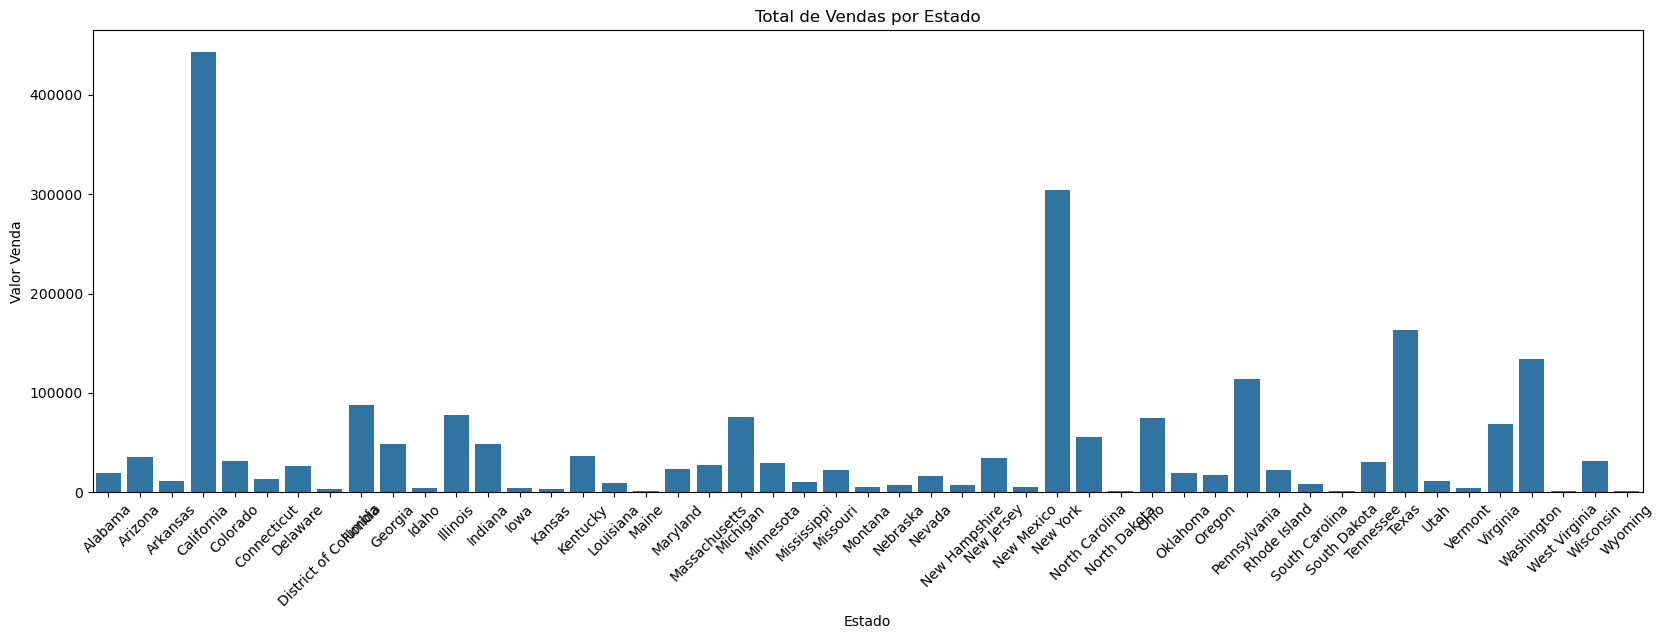

In [21]:
plt.figure(figsize = (20, 6))
sns.barplot(x ='Estado', y ='Valor_Venda', data = df_estado)
plt.xticks(rotation = 45)
plt.title('Total de Vendas por Estado')
plt.xlabel('Estado')
plt.ylabel('Valor Venda')
plt.show()

#### Outra maneira de resolver, segundo o professor da DSA:

In [22]:
df_dsa3 = df.groupby('Estado')['Valor_Venda'].sum().reset_index()

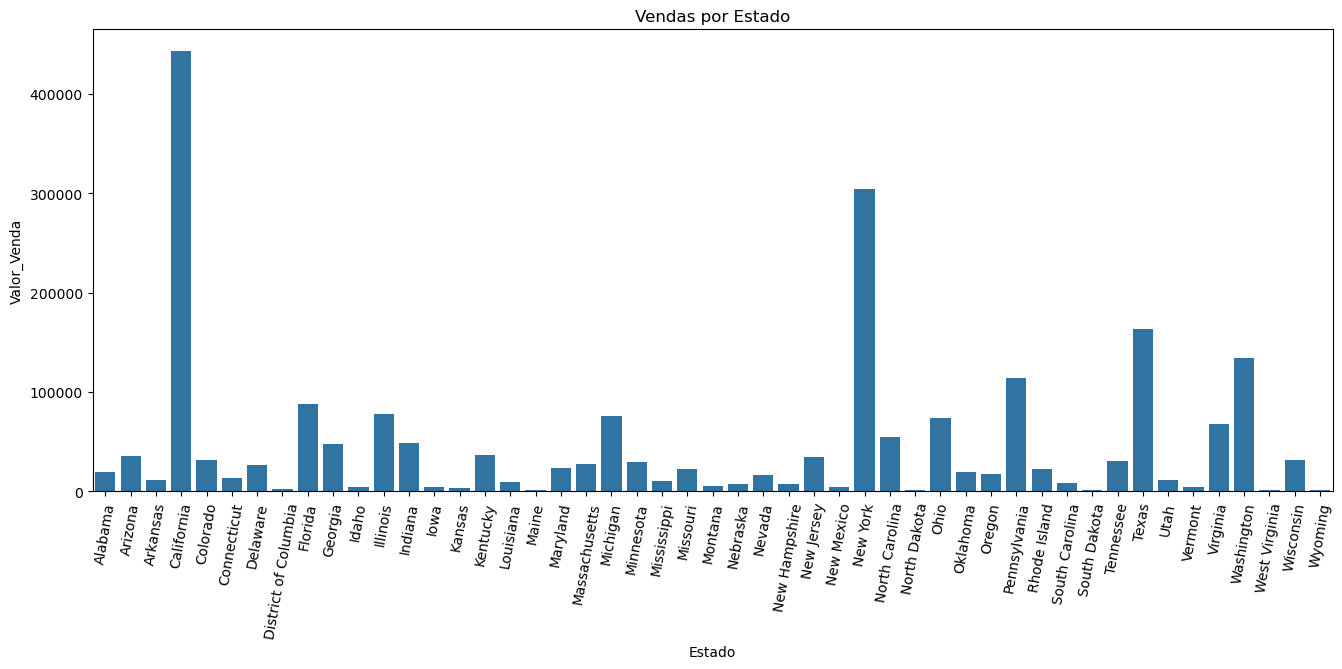

In [23]:
plt.figure(figsize = (16, 6))
sns.barplot(data = df_dsa3,
            y = 'Valor_Venda',
            x = 'Estado').set(title = 'Vendas por Estado')
plt.xticks(rotation = 80)
plt.show()

### Quais são as 10 cidades com Maior Total de Vendas?

In [24]:
df_cidade = df.groupby('Cidade')['Valor_Venda'].sum().reset_index()

In [25]:
df_topcidades = df_cidade.sort_values(by = 'Valor_Venda', ascending = False).head(10)

In [26]:
df_topcidades

,Cidade,Valor_Venda
327,New York City,251749.2190
265,Los Angeles,171654.6330
450,Seattle,114725.4780
436,San Francisco,107489.9520
372,Philadelphia,107197.8030
207,Houston,61590.1868
435,San Diego,47458.3790
80,Chicago,46974.3430
216,Jacksonville,44713.1830
123,Detroit,42446.9440


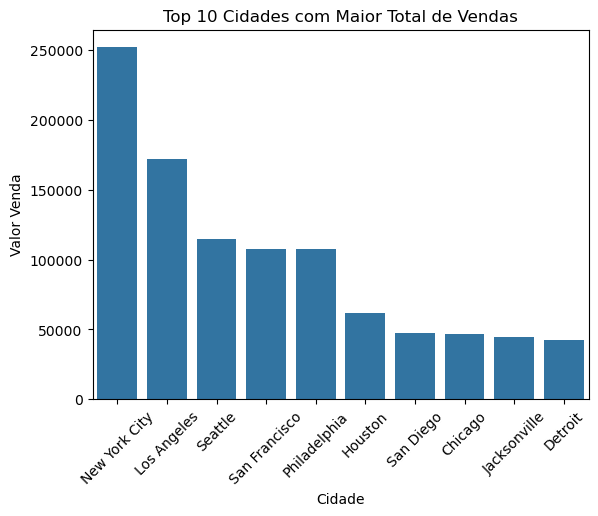

In [27]:
sns.barplot(x = 'Cidade', y = 'Valor_Venda', data = df_topcidades)
plt.xticks(rotation = 45)
plt.title('Top 10 Cidades com Maior Total de Vendas')
plt.xlabel('Cidade')
plt.ylabel('Valor Venda')
plt.show()

#### Outra maneira de resolver, segundo professor da DSA:

In [28]:
df_dsa4 = df.groupby('Cidade')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda', ascending = False).head(10)

In [29]:
df_dsa4.head(10)

,Cidade,Valor_Venda
327,New York City,251749.2190
265,Los Angeles,171654.6330
450,Seattle,114725.4780
436,San Francisco,107489.9520
372,Philadelphia,107197.8030
207,Houston,61590.1868
435,San Diego,47458.3790
80,Chicago,46974.3430
216,Jacksonville,44713.1830
123,Detroit,42446.9440


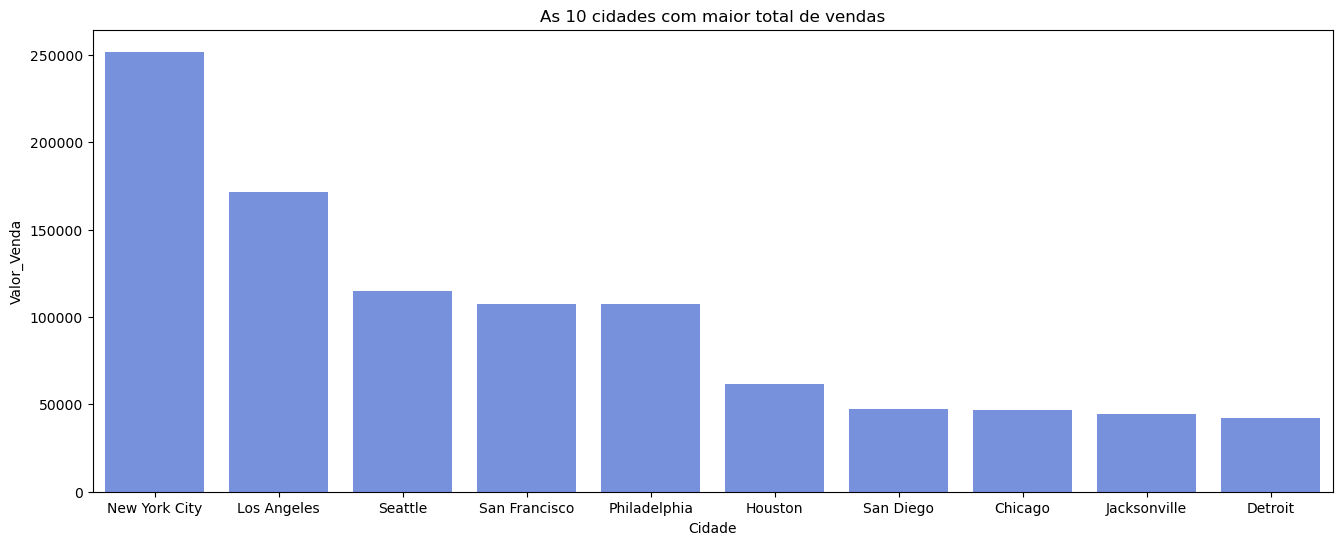

In [30]:
plt.figure(figsize = (16, 6))
sns.set_palette('coolwarm')
sns.barplot(data = df_dsa4,
            y = 'Valor_Venda',
            x = 'Cidade').set(title = 'As 10 cidades com maior total de vendas')
plt.show()

### Qual Segmento teve o maior total de vendas?

In [31]:
df_segmento = df.groupby('Segmento')['Valor_Venda'].sum()

In [32]:
df_segmento.head()

Segmento
Consumer       1.133834e+06
Corporate      6.792322e+05
Home Office    4.224914e+05
Name: Valor_Venda, dtype: float64

In [33]:
segmento = df_segmento.idxmax()
print(segmento)

Consumer


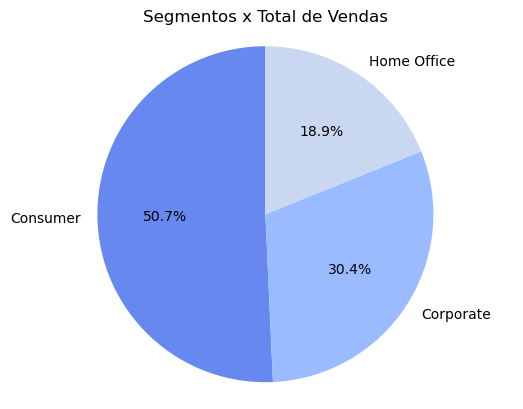

In [34]:
plt.pie(df_segmento, labels=df_segmento.index, autopct='%1.1f%%', startangle=90)
plt.title('Segmentos x Total de Vendas')
plt.axis('equal')
plt.show()

#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html
#https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct

#### Outra maneira de resolver, segundo o professor da DSA:

In [35]:
df_dsa5 = df.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda', ascending = False)

In [36]:
df_dsa5.head()

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


In [37]:
#Convertendo os dados em valor absoluto
def autopct_format(values):
    def df_format(pct):
        total = sum(values)
        val = int(round(pct*total / 100.0))
        return ' $ {v:d}'.format(v = val) #adicionar o cifrão na saída
    return df_format

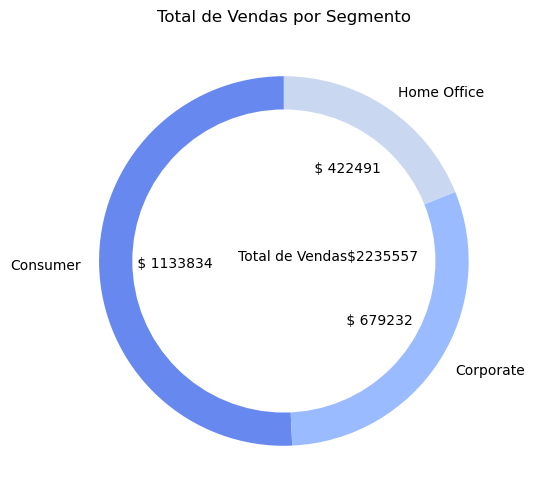

In [38]:
plt.figure(figsize = (16, 6))
plt.pie(df_dsa5['Valor_Venda'],
        labels = df_dsa5['Segmento'],
        autopct = autopct_format(df_dsa5['Valor_Venda']),
        startangle = 90)

#Limpa o círculo central
centre_circle = plt.Circle((0, 0), 0.82, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

#Labels e anotações
plt.annotate(text = 'Total de Vendas' + '$' + str(int(sum(df_dsa5['Valor_Venda']))), xy = (-0.25, 0))
plt.title('Total de Vendas por Segmento')
plt.show()

### Qual o total de Vendas por Segmento e por Ano?

In [39]:
df_ano = df.groupby(['Segmento', 'Data_Pedido'])['Valor_Venda'].sum().reset_index()

In [40]:
df_ano.head()

,Segmento,Data_Pedido,Valor_Venda
0,Consumer,01/01/2018,1478.228
1,Consumer,01/02/2015,468.900
2,Consumer,01/03/2015,1545.623
3,Consumer,01/03/2016,62.272
4,Consumer,01/03/2017,6125.822


In [41]:
#separando a data, para pegar apenas o ano
df['data_formatada'] = pd.to_datetime(df['Data_Pedido'], format='%d/%m/%Y', errors='coerce')

In [42]:
df['ano'] = df['data_formatada'].dt.year

In [43]:
total_vendas = df.groupby(['ano', 'Segmento'])['Valor_Venda'].sum().reset_index()

In [44]:
total_vendas.head()

,ano,Segmento,Valor_Venda
0,2015,Consumer,256719.9166
1,2015,Corporate,125819.5957
2,2015,Home Office,88229.0878
3,2016,Consumer,265295.2593
4,2016,Corporate,114643.1229


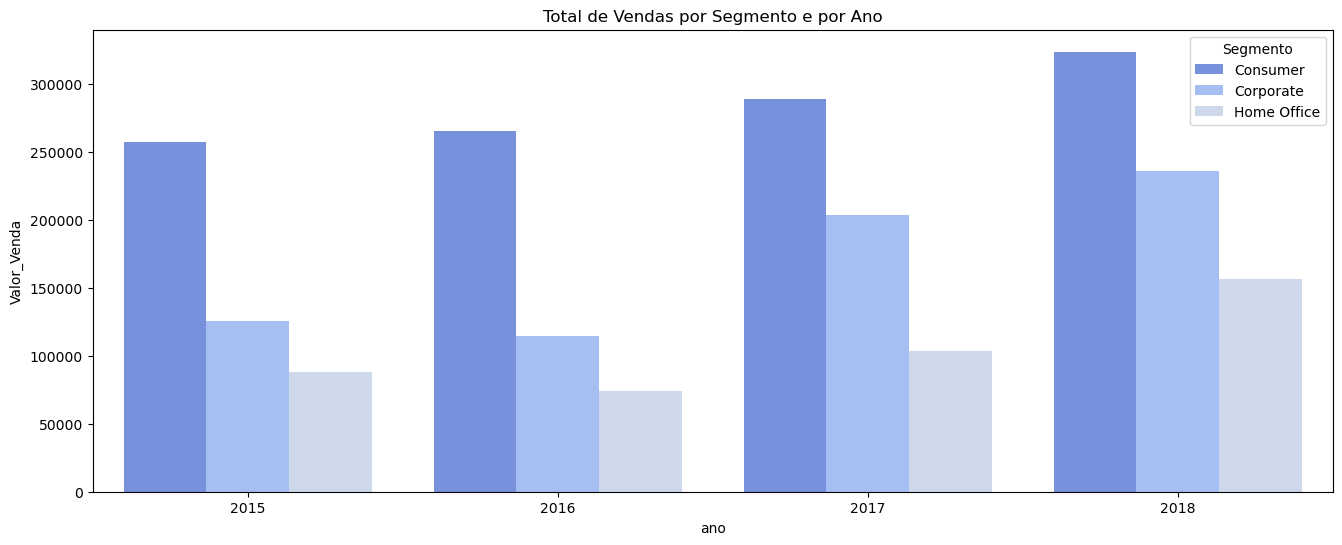

In [45]:
plt.figure(figsize = (16, 6))
sns.barplot(x = 'ano', y = 'Valor_Venda', data = total_vendas, hue = 'Segmento')
plt.title('Total de Vendas por Segmento e por Ano')
plt.show()

#### Outra maneira de resolver, segundo o professor da DSA:

In [46]:
df['Data_Pedido'] = pd.to_datetime(df['Data_Pedido'], dayfirst = True)

In [47]:
df.dtypes

ID_Pedido                 object
Data_Pedido       datetime64[ns]
ID_Cliente                object
Segmento                  object
Pais                      object
Cidade                    object
Estado                    object
ID_Produto                object
Categoria                 object
SubCategoria              object
Valor_Venda              float64
data_formatada    datetime64[ns]
ano                        int32
dtype: object

In [48]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,data_formatada,ano
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017-11-08,2017
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017-11-08,2017
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017-06-12,2017
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016-10-11,2016
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016-10-11,2016


In [49]:
df['Ano_dsa'] = df['Data_Pedido'].dt.year

In [50]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,data_formatada,ano,Ano_dsa
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017-11-08,2017,2017
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017-11-08,2017,2017
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017-06-12,2017,2017
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016-10-11,2016,2016
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016-10-11,2016,2016


In [51]:
df_dsa6 = df.groupby(['Ano_dsa', 'Segmento'])['Valor_Venda'].sum()

In [52]:
df_dsa6.head()

Ano_dsa  Segmento   
2015     Consumer       256719.9166
         Corporate      125819.5957
         Home Office     88229.0878
2016     Consumer       265295.2593
         Corporate      114643.1229
Name: Valor_Venda, dtype: float64

### Os  gestores  da  empresa  estão  considerando conceder  diferentes  faixas  de  descontos  e gostariam de fazer uma simulação com base na regra abaixo:
### Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
### Se o Valor_Venda for menor que 1000 recebe 10% de desconto.
### Quantas Vendas Receberiam 15% de Desconto?

In [53]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,data_formatada,ano,Ano_dsa
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017-11-08,2017,2017
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017-11-08,2017,2017
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017-06-12,2017,2017
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016-10-11,2016,2016
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016-10-11,2016,2016


In [54]:
df_maior = df.query('Valor_Venda > 1000')
df_maior.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,data_formatada,ano,Ano_dsa
10,CA-2015-115812,2015-06-09,BH-11710,Consumer,United States,Los Angeles,California,FUR-TA-10001539,Furniture,Tables,1706.184,2015-06-09,2015,2015
24,CA-2016-106320,2016-09-25,EB-13870,Consumer,United States,Orem,Utah,FUR-TA-10000577,Furniture,Tables,1044.630,2016-09-25,2016,2016
27,US-2016-150630,2016-09-17,TB-21520,Consumer,United States,Philadelphia,Pennsylvania,FUR-BO-10004834,Furniture,Bookcases,3083.430,2016-09-17,2016,2016
35,CA-2017-117590,2017-12-08,GH-14485,Corporate,United States,Richardson,Texas,TEC-PH-10004977,Technology,Phones,1097.544,2017-12-08,2017,2017
54,CA-2017-105816,2017-12-11,JM-15265,Corporate,United States,New York City,New York,TEC-PH-10002447,Technology,Phones,1029.950,2017-12-11,2017,2017


In [55]:
df_menor = df.query('Valor_Venda < 1000')
df_menor.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,data_formatada,ano,Ano_dsa
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017-11-08,2017,2017
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017-11-08,2017,2017
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017-06-12,2017,2017
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016-10-11,2016,2016
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016-10-11,2016,2016


In [56]:
df_maior.Valor_Venda.describe()

count      457.000000
mean      2116.807815
std       1963.539978
min       1000.020000
25%       1212.960000
50%       1516.200000
75%       2254.410000
max      22638.480000
Name: Valor_Venda, dtype: float64

In [57]:
print('No total 457 vendas receberiam 15% de desconto')

No total 457 vendas receberiam 15% de desconto


#### Outra maneira de resolver, segundo o professor da DSA:

In [58]:
import numpy as np

In [59]:
df['Desconto'] = np.where(df['Valor_Venda'] > 1000, 0.15, 0.10)

In [60]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,data_formatada,ano,Ano_dsa,Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017-11-08,2017,2017,0.1
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017-11-08,2017,2017,0.1
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017-06-12,2017,2017,0.1
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016-10-11,2016,2016,0.1
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016-10-11,2016,2016,0.1


In [61]:
df['Desconto'].value_counts()

Desconto
0.10    9243
0.15     457
Name: count, dtype: int64

In [62]:
print('No total 457 vendas receberiam desconto de 15%')

No total 457 vendas receberiam desconto de 15%


### Considere  Que  a  Empresa  Decida  Conceder  o  Desconto  de  15%  do  Item  Anterior.  Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

A média antes do valor do desconto é igual a 2116.807815

In [63]:
df_maior.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,data_formatada,ano,Ano_dsa
10,CA-2015-115812,2015-06-09,BH-11710,Consumer,United States,Los Angeles,California,FUR-TA-10001539,Furniture,Tables,1706.184,2015-06-09,2015,2015
24,CA-2016-106320,2016-09-25,EB-13870,Consumer,United States,Orem,Utah,FUR-TA-10000577,Furniture,Tables,1044.630,2016-09-25,2016,2016
27,US-2016-150630,2016-09-17,TB-21520,Consumer,United States,Philadelphia,Pennsylvania,FUR-BO-10004834,Furniture,Bookcases,3083.430,2016-09-17,2016,2016
35,CA-2017-117590,2017-12-08,GH-14485,Corporate,United States,Richardson,Texas,TEC-PH-10004977,Technology,Phones,1097.544,2017-12-08,2017,2017
54,CA-2017-105816,2017-12-11,JM-15265,Corporate,United States,New York City,New York,TEC-PH-10002447,Technology,Phones,1029.950,2017-12-11,2017,2017


In [64]:
df_maior = df.query('Valor_Venda > 1000').copy()
df_maior['valor_desconto'] = df_maior['Valor_Venda']*0.85

In [65]:
df_maior['valor_desconto'].mean()

1799.2866430196934

#### Outra maneira de resolver, segundo o professor da DSA:

In [66]:
df['Valor_Venda_Desconto'] = df['Valor_Venda'] - (df['Valor_Venda'] * df['Desconto'])

In [67]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,data_formatada,ano,Ano_dsa,Desconto,Valor_Venda_Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017-11-08,2017,2017,0.1,235.76400
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017-11-08,2017,2017,0.1,658.74600
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017-06-12,2017,2017,0.1,13.15800
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016-10-11,2016,2016,0.1,861.81975
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016-10-11,2016,2016,0.1,20.13120


In [68]:
df_dsa8_antes = df.loc[df['Desconto'] == 0.15, 'Valor_Venda']

In [69]:
df_dsa8_depois = df.loc[df['Desconto'] == 0.15, 'Valor_Venda_Desconto']

In [70]:
media_antes = df_dsa8_antes.mean()

In [71]:
media_depois = df_dsa8_depois.mean()

In [72]:
print("A média das vendas antes do desconto de 15%: ", round(media_antes, 2))

A média das vendas antes do desconto de 15%:  2116.81


In [73]:
print("A média das vendas depois do desconto de 15%: ", round(media_depois, 2))

A média das vendas depois do desconto de 15%:  1799.29


### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

In [74]:
#eu já possuo a data formatada, e a coluna de ano separada, então agora será para mês
df['mes'] = df['data_formatada'].dt.month

In [75]:
media_vendas = df.groupby(['ano', 'mes', 'Segmento'])['Valor_Venda'].mean().reset_index()

In [76]:
media_vendas.head()

,ano,mes,Segmento,Valor_Venda
0,2015,1,Consumer,146.736787
1,2015,1,Corporate,130.886769
2,2015,1,Home Office,329.855882
3,2015,2,Consumer,117.327926
4,2015,2,Corporate,69.235333


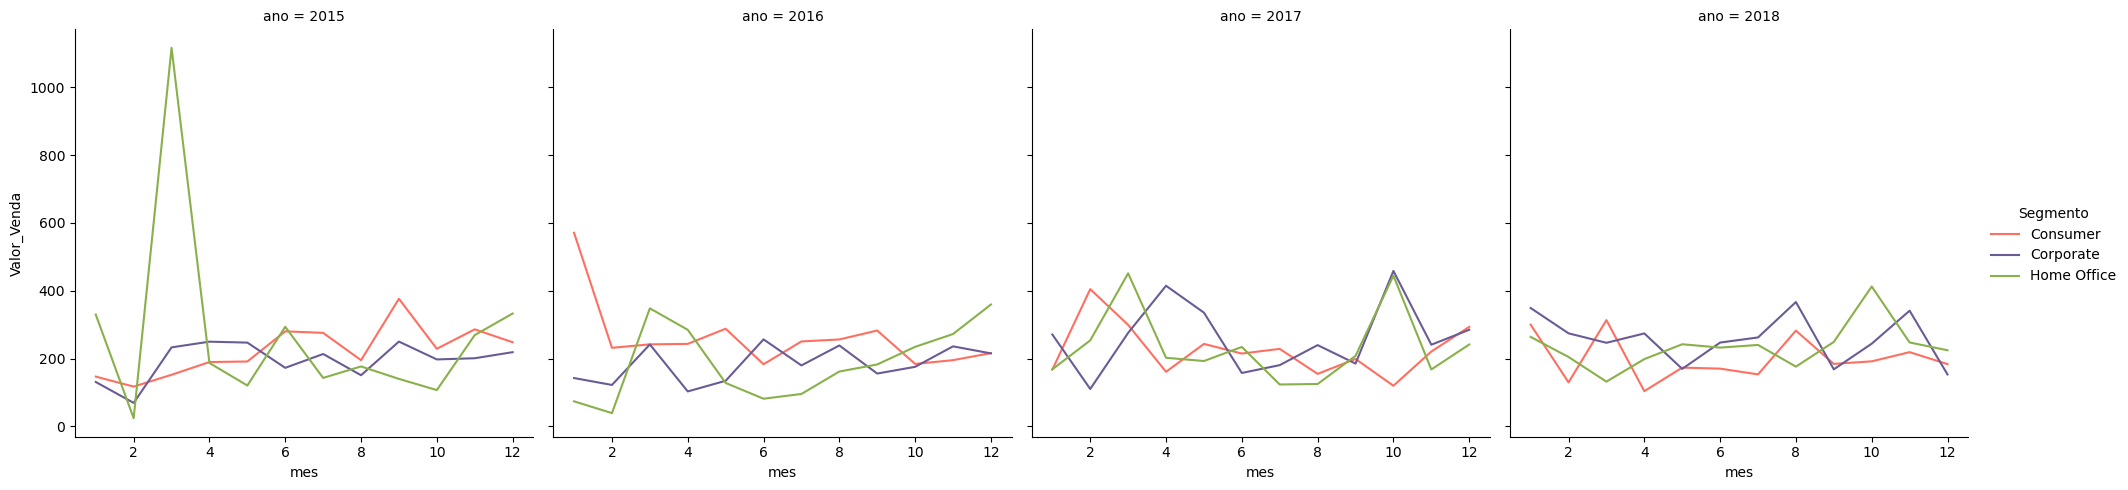

In [82]:
sns.relplot(data=media_vendas, x="mes", y="Valor_Venda", hue="Segmento", col="ano", kind="line")

#https://seaborn.pydata.org/generated/seaborn.relplot.html

#### Outra maneira de resolver, segundo o professor da DSA:

In [83]:
df['Mes_dsa'] = df['Data_Pedido'].dt.month

In [87]:
df_dsa9 = df.groupby(['ano', 'Mes_dsa', 'Segmento'])['Valor_Venda'].agg(['sum', 'mean', 'median'])

In [88]:
df_dsa9

sum        mean  median
ano  Mes_dsa Segmento                                   
2015 1       Consumer      6896.6290  146.736787  36.440
             Corporate     1701.5280  130.886769  51.940
             Home Office   5607.5500  329.855882  62.820
     2       Consumer      3167.8540  117.327926  22.776
             Corporate      623.1180   69.235333  62.310
...                              ...         ...     ...
2018 11      Corporate    44357.9862  341.215278  79.530
             Home Office  24009.3840  247.519423  56.560
     12      Consumer     48107.4558  183.616244  52.533
             Corporate    20524.4320  153.167403  46.460
             Home Office  13022.3910  224.523983  49.260

[144 rows x 3 columns]

In [90]:
#extraindo os níveis
anos = df_dsa9.index.get_level_values('ano')
meses = df_dsa9.index.get_level_values('Mes_dsa')
segmentos = df_dsa9.index.get_level_values('Segmento')

<Figure size 1200x600 with 0 Axes>

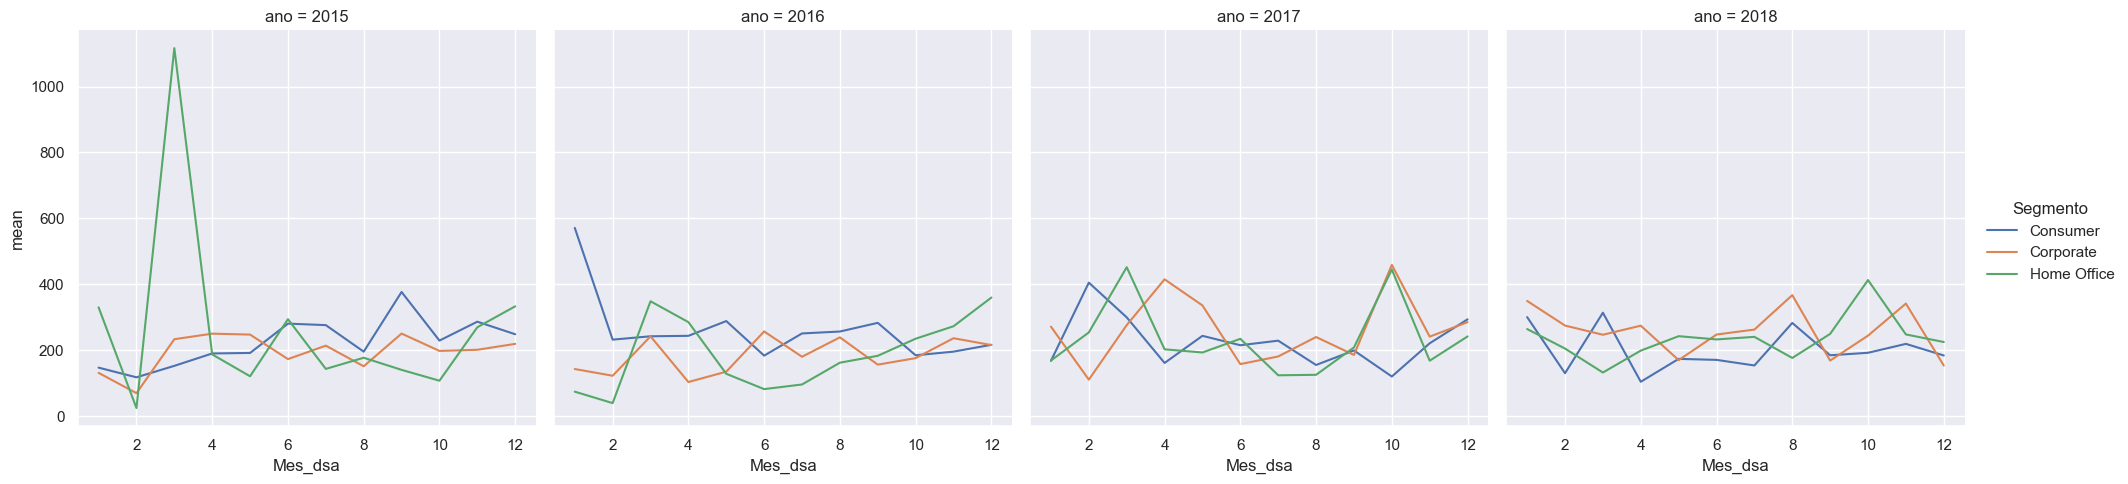

In [91]:
plt.figure(figsize = (12, 6))
sns.set()
fig1 = sns.relplot(kind = 'line',
                   data = df_dsa9,
                   y = 'mean',
                   x = meses,
                   hue = segmentos,
                   col = anos,
                   col_wrap = 4)
plt.show()

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias?

In [93]:
df_subcategoria = df.groupby(['Categoria', 'SubCategoria'])['Valor_Venda'].sum().reset_index()

In [94]:
df_subcategoria.head()

,Categoria,SubCategoria,Valor_Venda
0,Furniture,Bookcases,108045.0467
1,Furniture,Chairs,317919.6250
2,Furniture,Furnishings,88862.7700
3,Furniture,Tables,202083.3600
4,Office Supplies,Appliances,104061.6930


In [95]:
df_topsubs = df_subcategoria.sort_values(by = 'Valor_Venda', ascending = False).head(12)

In [96]:
df_topsubs

,Categoria,SubCategoria,Valor_Venda
16,Technology,Phones,325271.2940
1,Furniture,Chairs,317919.6250
11,Office Supplies,Storage,216188.3620
3,Furniture,Tables,202083.3600
6,Office Supplies,Binders,194723.3810
15,Technology,Machines,189238.6310
13,Technology,Accessories,162791.3620
14,Technology,Copiers,146248.0940
0,Furniture,Bookcases,108045.0467
4,Office Supplies,Appliances,104061.6930


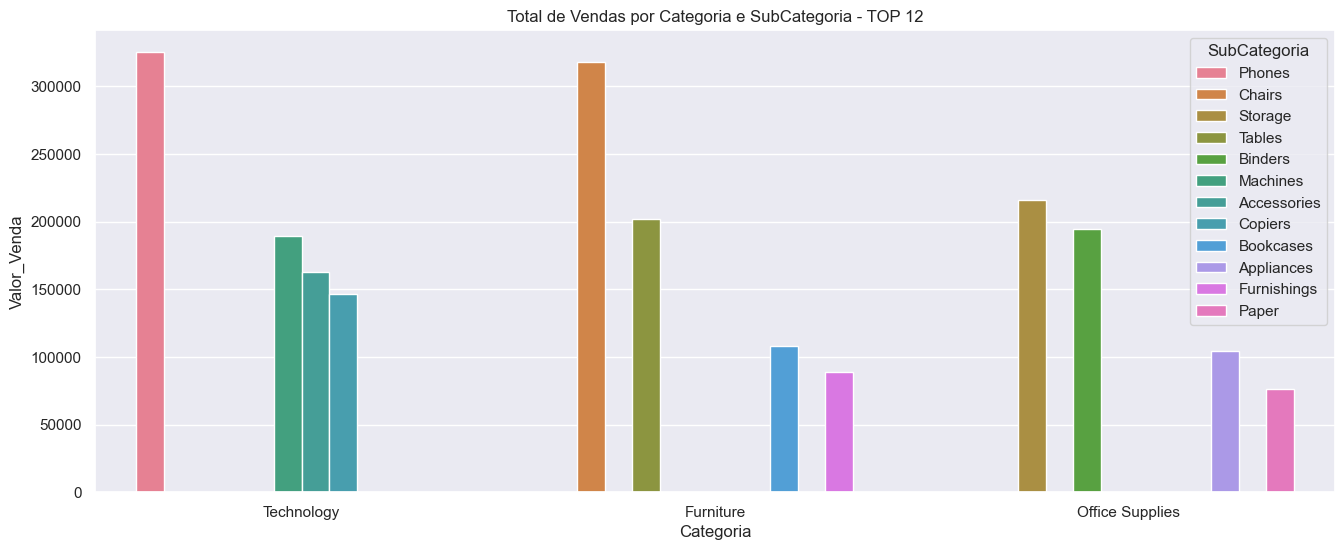

In [101]:
plt.figure(figsize = (16, 6))
sns.barplot(df_topsubs, x="Categoria", y="Valor_Venda", hue="SubCategoria")
plt.title('Total de Vendas por Categoria e SubCategoria - TOP 12')
plt.show()

#### Outra maneira de resolver, segundo o professor da DSA:¶

In [102]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,data_formatada,ano,Ano_dsa,Desconto,Valor_Venda_Desconto,mes,Mes_dsa
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017-11-08,2017,2017,0.1,235.76400,11,11
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017-11-08,2017,2017,0.1,658.74600,11,11
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017-06-12,2017,2017,0.1,13.15800,6,6
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016-10-11,2016,2016,0.1,861.81975,10,10
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016-10-11,2016,2016,0.1,20.13120,10,10


In [103]:
df_dsa10 = df.groupby(['Categoria',
                       'SubCategoria']).sum(numeric_only = True).sort_values('Valor_Venda', ascending = False).head(12)

In [104]:
df_dsa10 = df_dsa10[['Valor_Venda']].astype(int).sort_values(by = 'Categoria').reset_index()

In [105]:
df_dsa10

,Categoria,SubCategoria,Valor_Venda
0,Furniture,Chairs,317919
1,Furniture,Tables,202083
2,Furniture,Bookcases,108045
3,Furniture,Furnishings,88862
4,Office Supplies,Storage,216188
5,Office Supplies,Binders,194723
6,Office Supplies,Appliances,104061
7,Office Supplies,Paper,76312
8,Technology,Phones,325271
9,Technology,Machines,189238


In [106]:
df_dsa10_cat = df_dsa10.groupby('Categoria').sum(numeric_only = True).reset_index()
df_dsa10_cat

,Categoria,Valor_Venda
0,Furniture,716909
1,Office Supplies,591284
2,Technology,823548


In [107]:
cores_categorias = ['#5d00de',
                    '#0ee84f',
                    '#e80e27']

In [108]:
cores_subcategorias = ['#aa8cd4',
                       '#aa8cd5',
                       '#aa8cd6',
                       '#aa8cd7',
                       '#26c957',
                       '#26c958',
                       '#26c959',
                       '#26c960',
                       '#e65e65',
                       '#e65e66',
                       '#e65e67',
                       '#e65e68']

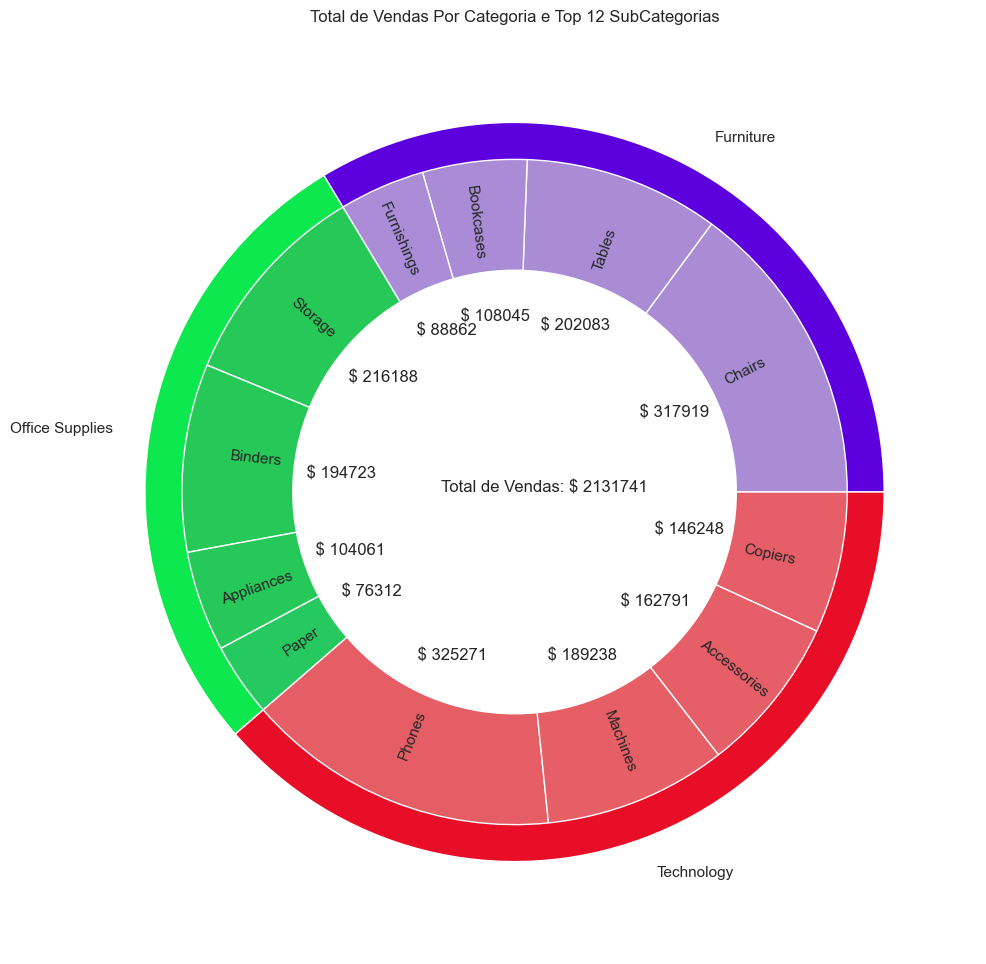

In [111]:
# Tamanho da figura
fig, ax = plt.subplots(figsize = (18,12))

# Gráfico das categorias
p1 = ax.pie(df_dsa10_cat['Valor_Venda'], 
            radius = 1,
            labels = df_dsa10_cat['Categoria'],
            wedgeprops = dict(edgecolor = 'white'),
            colors = cores_categorias)

# Gráfico das subcategorias
p2 = ax.pie(df_dsa10['Valor_Venda'],
            radius = 0.9,
            labels = df_dsa10['SubCategoria'],
            autopct = autopct_format(df_dsa10['Valor_Venda']),
            colors = cores_subcategorias, 
            labeldistance = 0.7,
            wedgeprops = dict(edgecolor = 'white'), 
            pctdistance = 0.53,
            rotatelabels = True)

# Limpa o centro do círculo
centre_circle = plt.Circle((0, 0), 0.6, fc = 'white')

# Labels e anotações
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(df_dsa10['Valor_Venda']))), xy = (-0.2, 0))
plt.title('Total de Vendas Por Categoria e Top 12 SubCategorias')
plt.show()